In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style
import matplotlib as mpl
import math

#Set default figure size
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

#The following function was taken from
# https://www.mikulskibartosz.name/wilson-score-in-python-example/
# The Wikipedia page discussing the Binomial proportion confidence interval is
# https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
def wilson(p, n, z = 1.96):
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z*z / (2*n)
    adjusted_standard_deviation = sqrt((p*(1 - p) + z*z / (4*n)) / n)
    
    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator
    return (lower_bound, upper_bound)

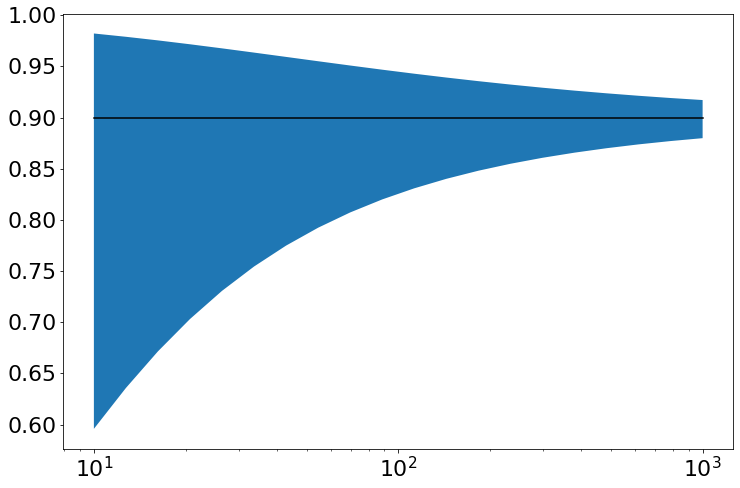

In [33]:
p=0.9
nArray = np.logspace(1,3,20)
errors = [wilson(p,n) for n in nArray]

pArray = [p for n in nArray]
fig, ax = plt.subplots()

ax.plot(nArray,pArray, 'k-')
eLow, eHigh = zip(*errors)
ax.fill_between(nArray, eLow, eHigh )
#print(eLow)
plt.xscale('log')


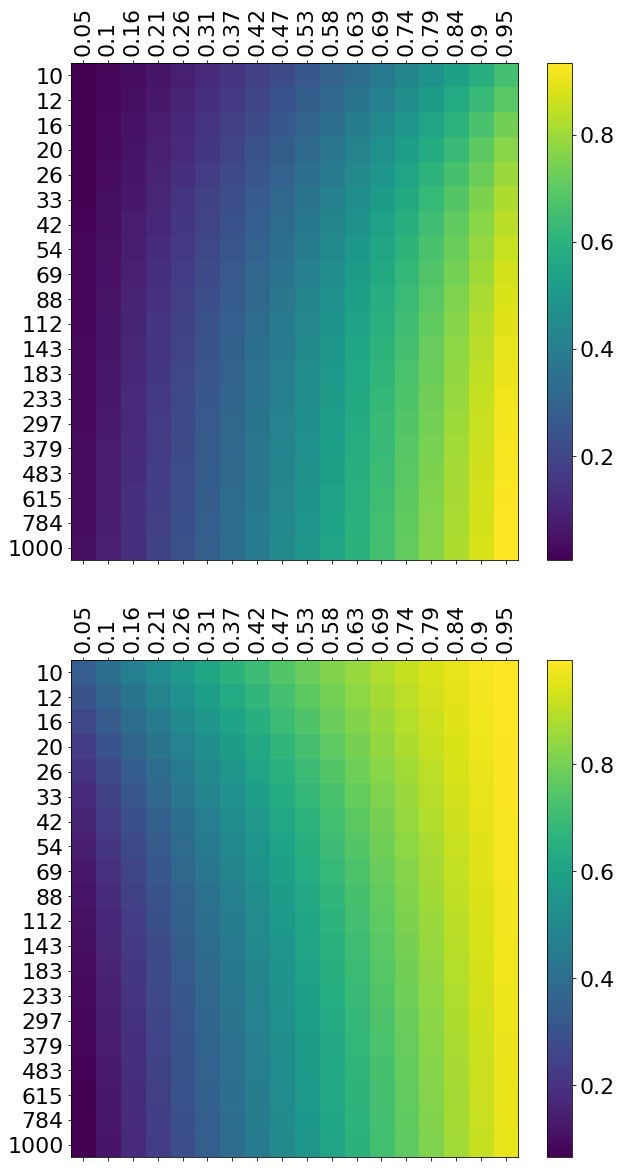

In [57]:
pArray = np.linspace(0.05,0.95,18)
errors = [[wilson(p,n) for p in pArray] for n in nArray]

eLow = [[e[0] for e in f] for f in errors]
eHigh = [[e[1] for e in f] for f in errors]



#print(eLow)

fig, ax = plt.subplots(2, 1)
im=ax[0].matshow(eLow)
cb = fig.colorbar(im,ax=ax[0])

pLabel = [float('%.2g' % p) for p in pArray]
nLabel = [int('%d' % n) for n in nArray]

ax[0].set_yticks(np.arange(len(nLabel)))
ax[0].set_xticks(np.arange(len(pLabel)))
ax[0].set_xticklabels(pLabel,rotation=90)
_ =ax[0].set_yticklabels(nLabel)
im=ax[1].matshow(eHigh)
cb = fig.colorbar(im, ax = ax[1])

pLabel = [float('%.2g' % p) for p in pArray]
nLabel = [int('%d' % n) for n in nArray]

ax[1].set_yticks(np.arange(len(nLabel)))
ax[1].set_xticks(np.arange(len(pLabel)))
ax[1].set_xticklabels(pLabel,rotation=90)
_ =ax[1].set_yticklabels(nLabel)
plt.subplots_adjust(bottom=0.1, right=0.8, top=2)
